In [41]:
import numpy as np
from matplotlib import pyplot as plt, markers

In [42]:
RANDOM_SEED = 0x0

# TASK 1 (3 Points): K-Means using scikit-learn

First we will generate some data. The variable `X` will contain the data used in this section.

In [43]:
from sklearn.datasets import make_blobs

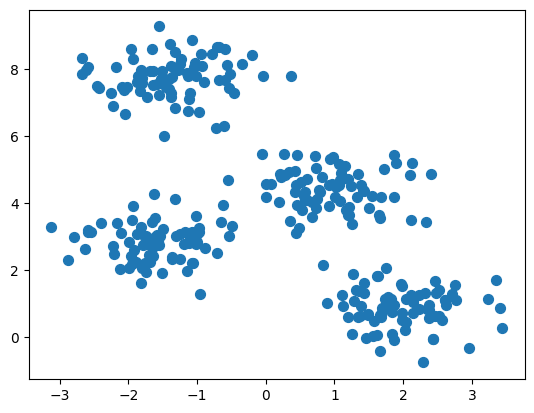

In [44]:
X, _ = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=.6,
    random_state=RANDOM_SEED,
)

plt.scatter(X[:, 0], X[:, 1], s=50)

### Task 1a

Cluster the above data using the K-Means implementation provided by scikit-learn.
Refer to the official documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

* create an instance of the class `sklearn.cluster.KMeans`
* choose a suitable value for the `n_clusters` parameter
* call the `.fit` method to compute the clustering
* call the `.predict` method to get cluster labels for each data point

In [45]:
from sklearn.cluster import KMeans

In [46]:
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(X)
prediction = kmeans.predict(X)
display()

### Task 1b

Visualize the resulting clustering.

* use the `plt.scatter` function (see: <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html>)
* set the color parameter `c` to the cluster labels you computed above

* Optional: also plot the cluster centers (hint: call `plt.scatter` a second time, the cluster centers are stored in the `.cluster_centers_` member of the `KMeans` object)

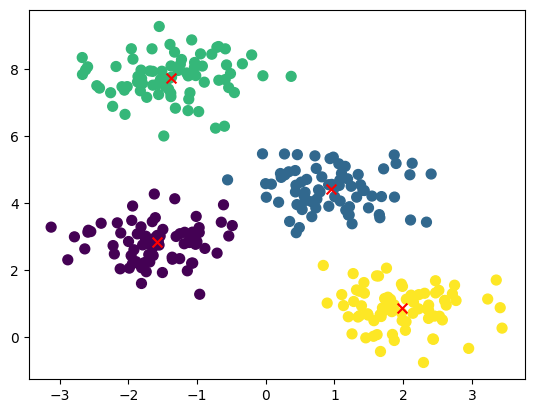

In [47]:
plt.scatter(X[:, 0], X[:, 1], s=50, c=prediction)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, marker="x", c="red")

### Task 1c

Try different numbers of clusters and print the average silhouette scores using
`sklearn.metrics.silhouette_score`. Refer to the documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score>

* What does the silhouette score tell you?
* What conclusions do you draw from the numbers?


_Partitioning the points into 4 clusters seems to yield the best results (see below)._

In [48]:
from sklearn.metrics import silhouette_score

2: 0.5426422297358302
3: 0.5890390393551768
4: 0.6819938690643478
5: 0.5769760250964397
6: 0.48062062881761086
7: 0.42347350274100487
8: 0.3918460532721257
9: 0.3822158660000981
10: 0.3489077065643289
11: 0.3514813699844034
12: 0.3459135250760061
13: 0.36579936997446943
14: 0.34922324623239426
15: 0.35848175449191255
16: 0.31167259664840213
17: 0.350269904805511
18: 0.35175163610875726
19: 0.37261697841543334
20: 0.35672042043457564


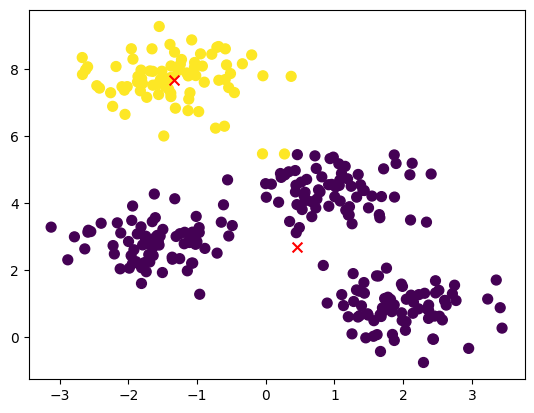

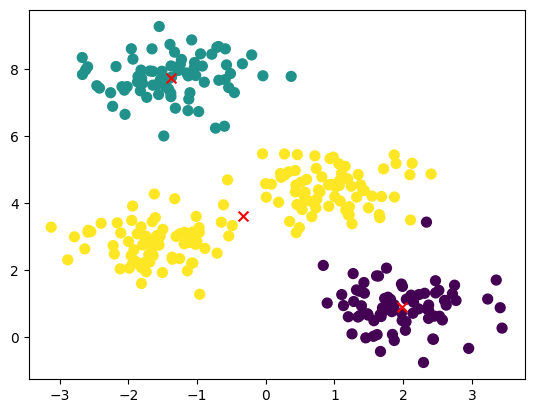

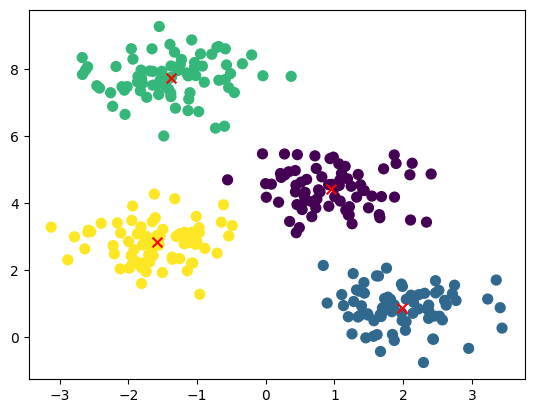

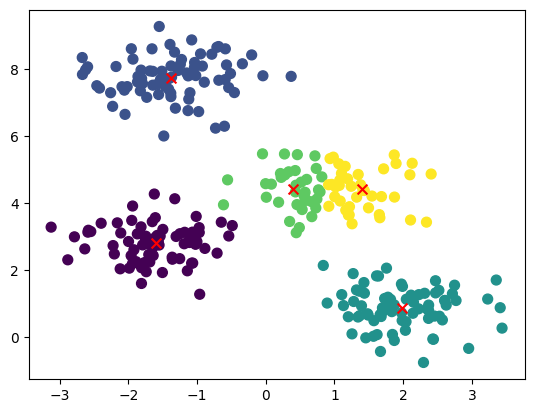

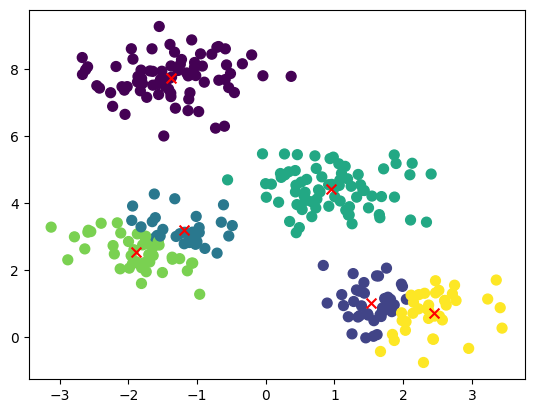

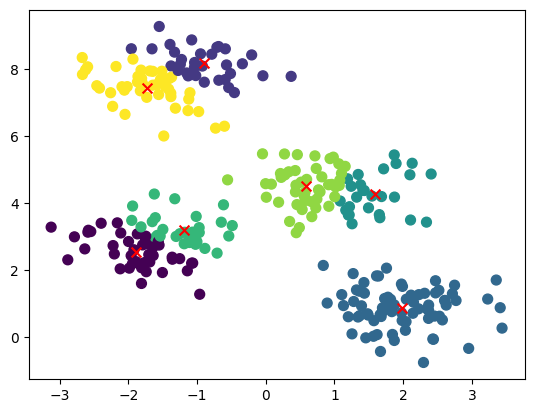

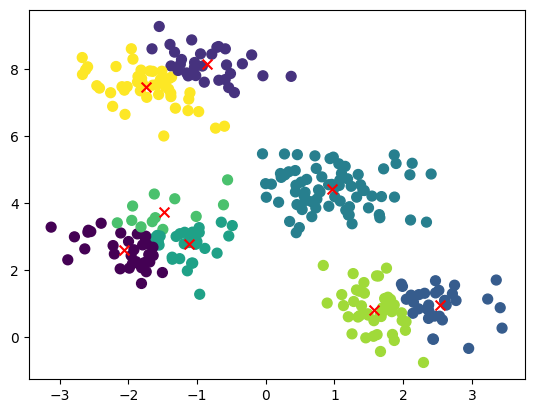

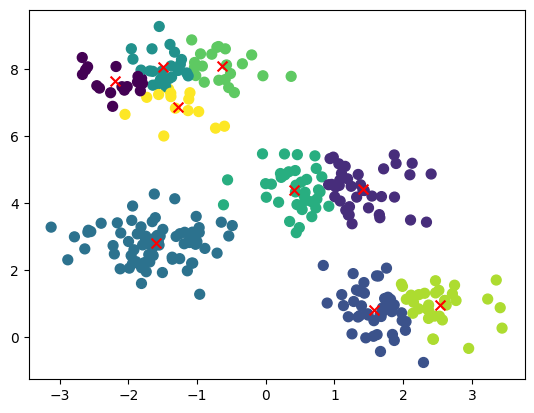

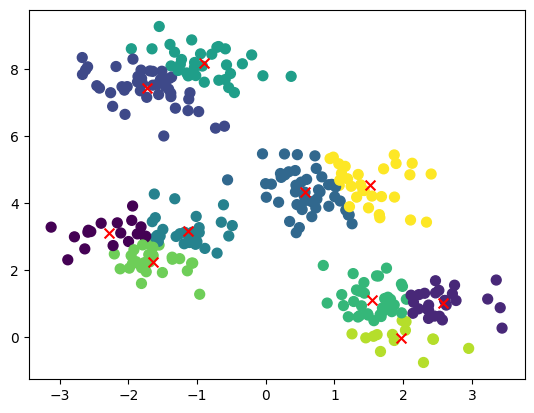

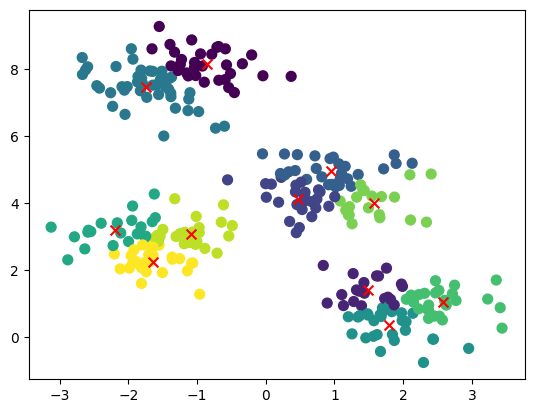

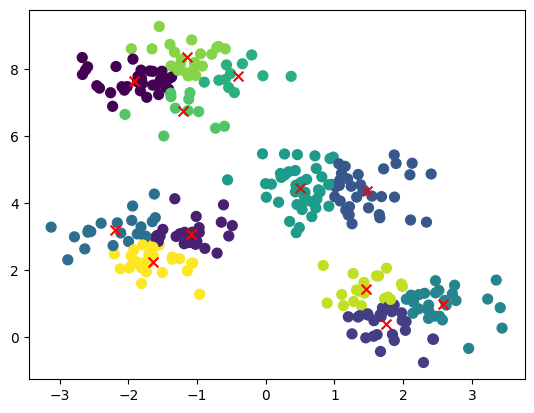

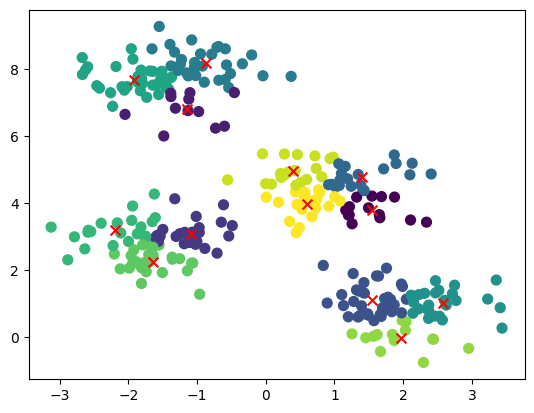

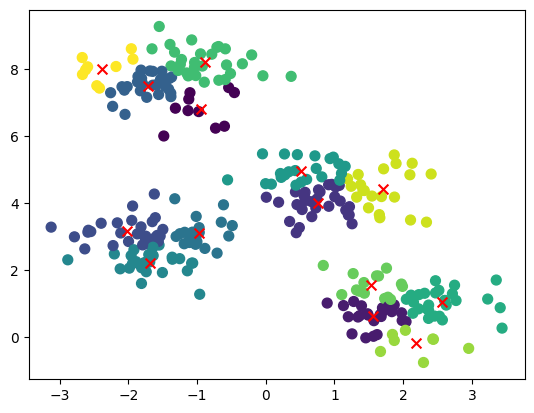

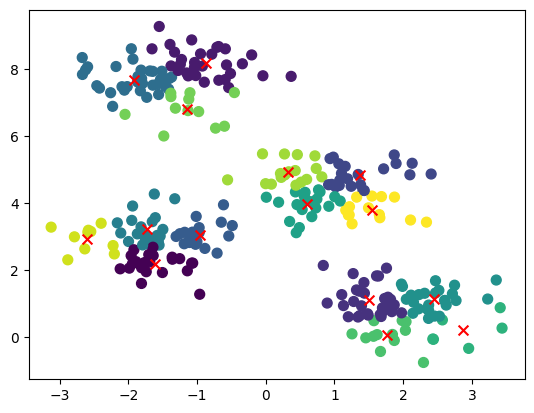

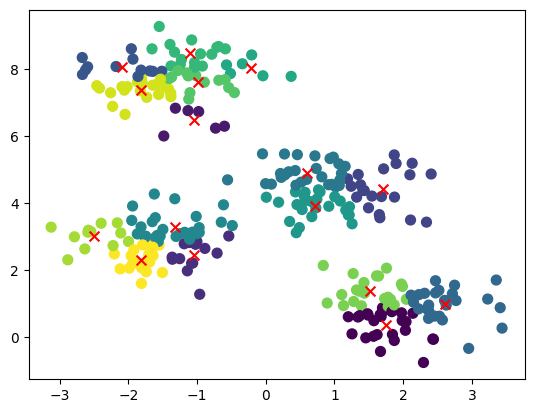

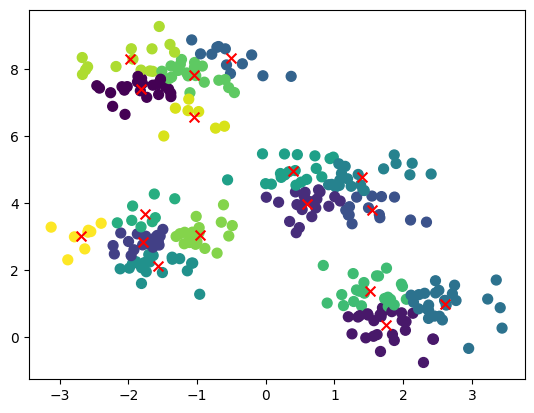

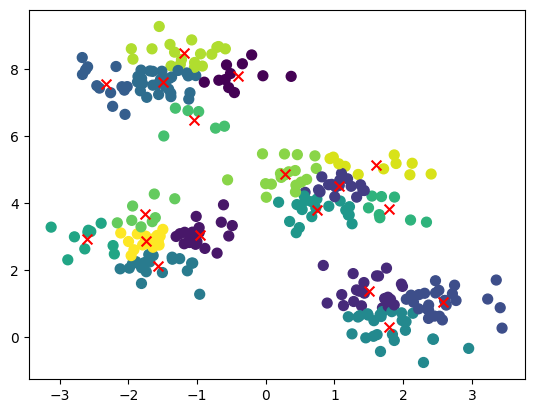

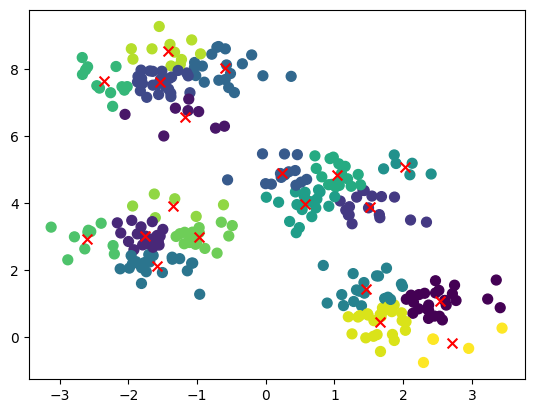

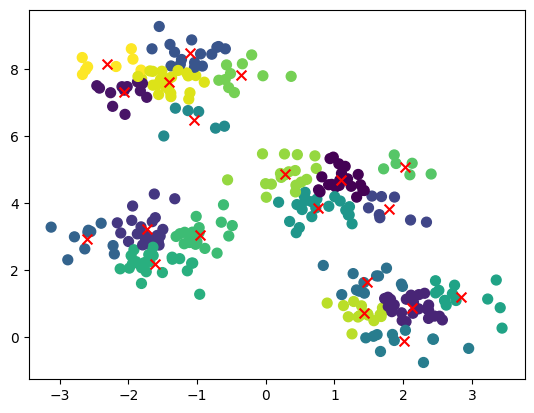

In [49]:
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    labels = kmeans.fit_predict(X)
    fig = plt.figure(i)
    plt.scatter(X[:, 0], X[:, 1], s=50, c=labels)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, marker="x", c="red")
    print(f"{i}: {silhouette_score(X, labels)}")

## 📢 **HAND-IN** 📢: Report in Moodle whether you solved this task.

# TASK 2 (2 Points): DBSCAN

First, let's setup the data used in this section. We will redefine the variable `X` containing the data to be clustered.

In [50]:
from sklearn.datasets import make_moons

In [51]:
X, _ = make_moons(
    n_samples=200,
    noise=.05,
    random_state=RANDOM_SEED,
)

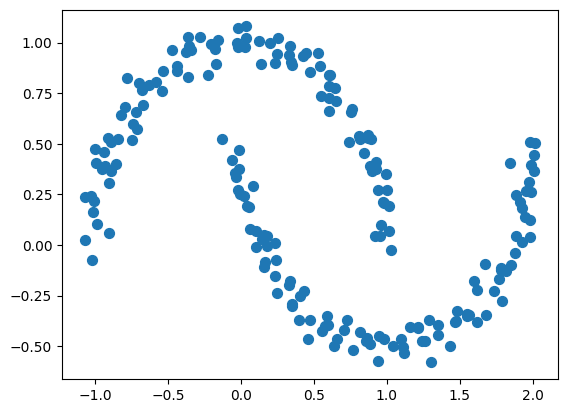

In [52]:
plt.scatter(X[:, 0], X[:, 1], s=50)

### Task 2a

* cluster the new data `X` using `KMeans`
* set `n_clusters=2`
* visualize and analyse the resulting clustering
* What do you think of the result? Did something go wrong?

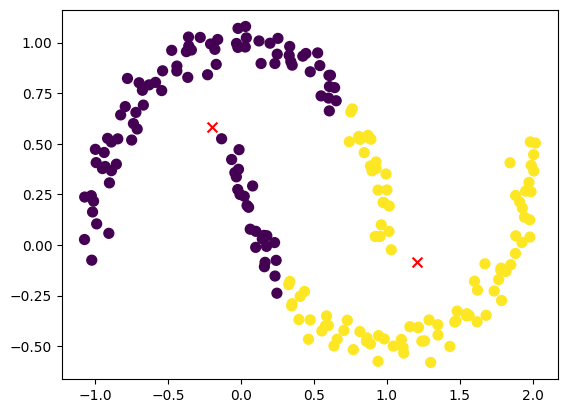

In [53]:
kmeans = KMeans(n_clusters=2, n_init='auto')
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s=50, c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, marker="x", c="red")

_As the K-Means algorithm finds fitting places where points are centered around and the groups are not spreaded in a centric form, the algorithm yields an unfitting result._

### Task 2b

Let's use `sklearn.cluster.DBSCAN` instead. Refer to the documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html>

* cluster the data using `DBSCAN`
* try different values for `eps` and `min_samples` until you can cluster the two half-moons

In [54]:
from sklearn.cluster import DBSCAN

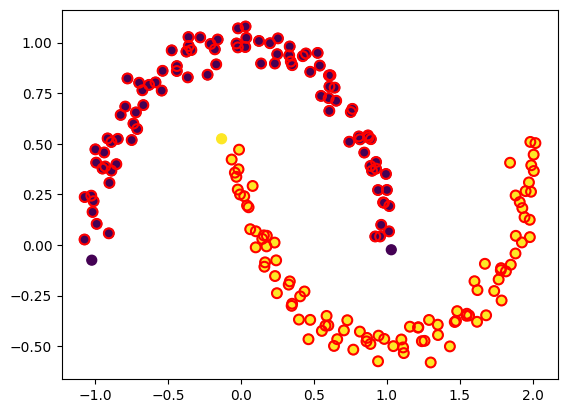

In [55]:
dbscan = DBSCAN(0.2, min_samples=6)
labels = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s=50, c=labels)

plt.scatter(
    X[dbscan.core_sample_indices_, 0],
    X[dbscan.core_sample_indices_, 1],
    s=50,
    marker=markers.MarkerStyle("o", fillstyle='none'),
    c="red")

## 📢 **HAND-IN** 📢: Report in Moodle whether you solved this task.